# Approach:2.1 - with R (using CSV file)

In [8]:
# Importing the necessary libraries for data manipulation, analysis and visualization 

library(dplyr)
library(readr)
library(ggplot2)
library(ggExtra)
library(RColorBrewer)

######

In [9]:
# Reading the data from the CSV file

file_path <- 'C:/Users/Lenovo/Downloads/spotify.csv'
spotify_df <- read_csv(file_path)

New names:
• `` -> `...1`
Rows: 114000 Columns: 21
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): track_id, artists, album_name, track_name, track_genre
dbl (15): ...1, popularity, duration_ms, danceability, energy, key, loudness...
lgl  (1): explicit

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


######

In [10]:
# Updating the column name of 'duration_ms' for song duration and 'track_genre' for song genre as per assignment terminology 

colnames(spotify_df)[which(colnames(spotify_df) == 'duration_ms')] <- 'song_duration'
colnames(spotify_df)[which(colnames(spotify_df) == 'track_genre')] <- 'song_genre'

######

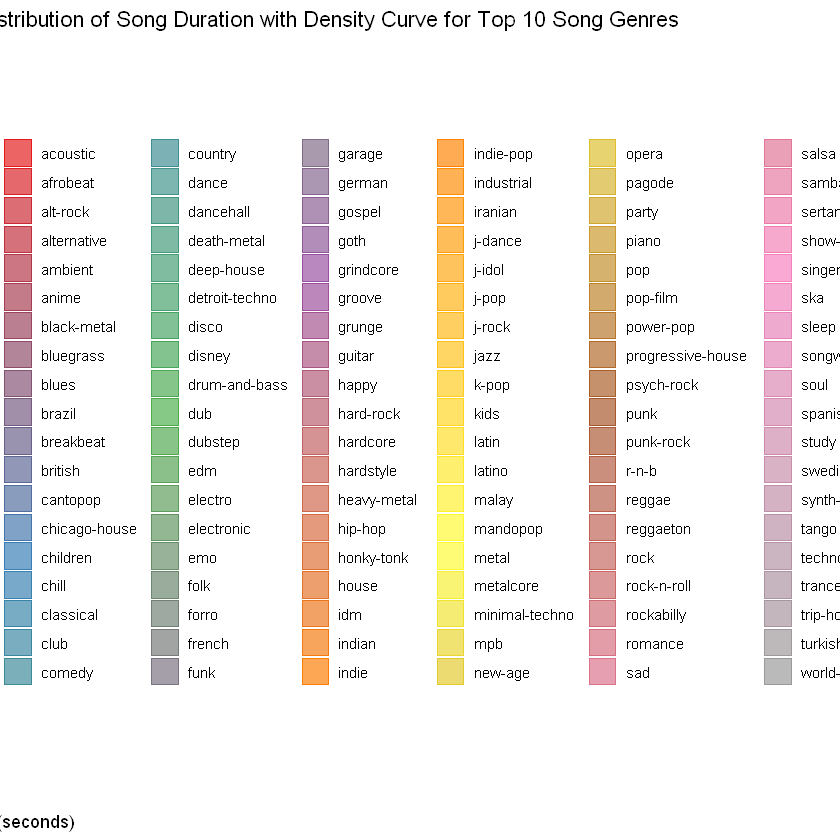

In [12]:
# Filtering out genres with fewer than 2 data points

filtered_spotify_df <- spotify_df %>%
  group_by(song_genre) %>%
  filter(n() > 1) %>%
  ungroup()

# Identify the top 10 song genres based on the number of songs

top_genres <- filtered_spotify_df %>%
  count(song_genre) %>%
  top_n(10, n) %>%
  pull(song_genre)

top_genres_df <- filtered_spotify_df %>%
  filter(song_genre %in% top_genres)


# Create a color palette with enough distinct colors

num_genres <- n_distinct(top_genres_df$song_genre)
palette <- colorRampPalette(brewer.pal(9, "Set1"))(num_genres)


# Creating the plot and Histogram with density plot

ggplot(top_genres_df, aes(x = song_duration, fill = song_genre, color = song_genre)) +
  geom_histogram(alpha = 0.6, position = 'identity', bins = 30) +
  geom_density(alpha = 0.2) +
  labs(
    title = 'Distribution of Song Duration with Density Curve for Top 10 Song Genres',
    x = 'Song Duration (seconds)',
    y = 'Count'
  ) +
  theme_minimal() +
  theme(legend.title = element_blank()) +
  scale_fill_manual(values = palette) +
  scale_color_manual(values = palette)
